In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('house_pricing.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.set_index('Id',inplace=True)

In [6]:
df.columns=df.columns.str.lower()

In [7]:
pd.set_option('display.max_rows', 100)

In [8]:
df.isna().mean().sample(80).sort_values(ascending=False).head(6)

poolqc         0.995205
miscfeature    0.963014
alley          0.937671
fence          0.807534
fireplacequ    0.472603
lotfrontage    0.177397
dtype: float64

<AxesSubplot:xlabel='fence', ylabel='saleprice'>

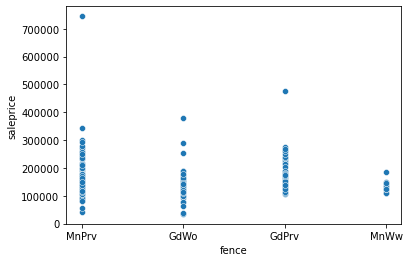

In [9]:
fence=df.loc[~df.fence.isna(),['fence','saleprice']]
sns.scatterplot(data=fence,x='fence',y='saleprice')

<AxesSubplot:xlabel='fireplacequ', ylabel='saleprice'>

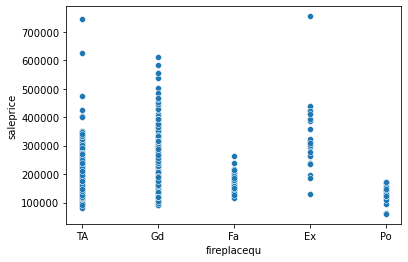

In [10]:
fireplacequ=df.loc[~df.fireplacequ.isna(),['fireplacequ','saleprice']]
sns.scatterplot(data=fireplacequ,x='fireplacequ',y='saleprice')

<AxesSubplot:xlabel='lotfrontage', ylabel='saleprice'>

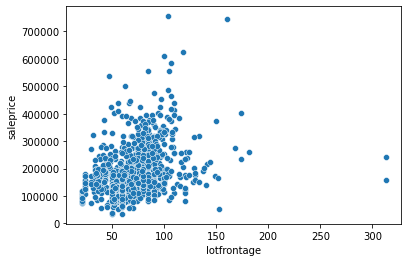

In [11]:
lotfrontage=df.loc[~df.lotfrontage.isna(),['lotfrontage','saleprice']]
sns.scatterplot(data=lotfrontage,x='lotfrontage',y='saleprice')

In [12]:
df.dropna(axis=1,thresh=df.shape[0]*(1-0.20)).isna().mean().sort_values(ascending=False).head()

lotfrontage    0.177397
garagetype     0.055479
garageyrblt    0.055479
garagecond     0.055479
garagequal     0.055479
dtype: float64

In [13]:
df=df.dropna(axis=1,thresh=df.shape[0]*(1-0.2))

In [14]:
df=df[df.nunique().sort_values()[df.nunique().sort_values()>40].index]

In [15]:
df.columns

Index(['yearremodadd', 'screenporch', 'garageyrblt', 'lotfrontage',
       'yearbuilt', 'enclosedporch', 'bsmtfinsf2', 'openporchsf', 'wooddecksf',
       'masvnrarea', '2ndflrsf', 'garagearea', 'bsmtfinsf1', 'saleprice',
       'totalbsmtsf', '1stflrsf', 'bsmtunfsf', 'grlivarea', 'lotarea'],
      dtype='object')

<AxesSubplot:xlabel='yearremodadd', ylabel='saleprice'>

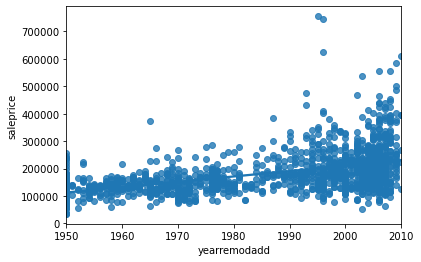

In [16]:
sns.regplot(data=df,x='yearremodadd',y='saleprice')

<AxesSubplot:>

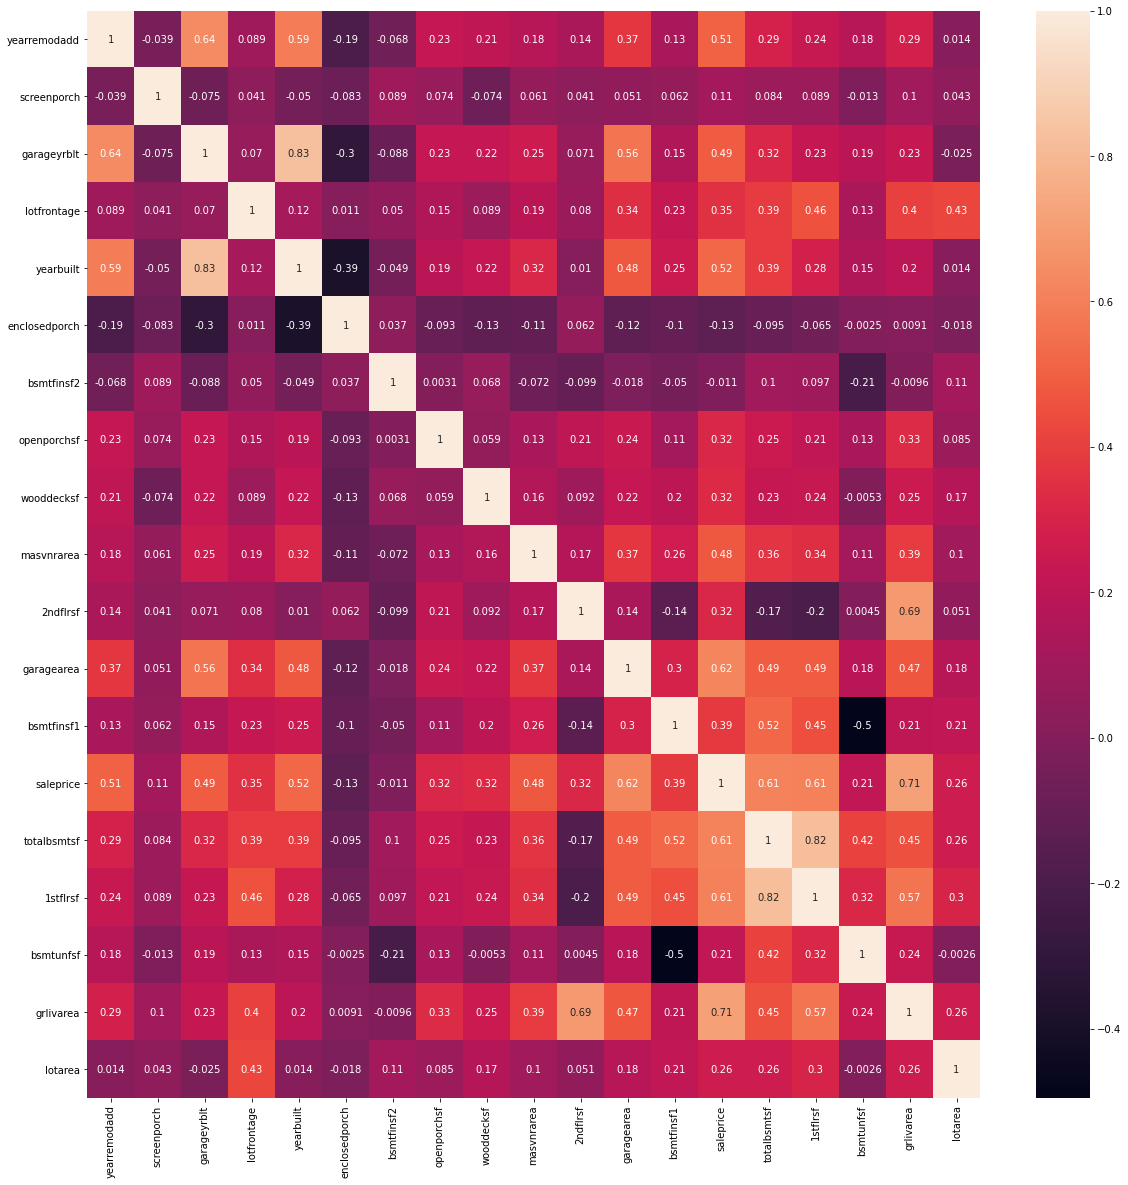

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['yearremodadd', 'screenporch', 'garageyrblt', 'lotfrontage',
       'yearbuilt', 'enclosedporch', 'bsmtfinsf2', 'openporchsf', 'wooddecksf',
       'masvnrarea', '2ndflrsf', 'garagearea', 'bsmtfinsf1', 'saleprice',
       'totalbsmtsf', '1stflrsf', 'bsmtunfsf', 'grlivarea', 'lotarea'],
      dtype='object')

In [19]:
df.drop(['bsmtfinsf2','screenporch','enclosedporch'],axis=1,inplace=True)

In [20]:
X=df.drop('saleprice',axis=1)
y=df.saleprice

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
from fancyimpute import IterativeImputer

Using TensorFlow backend.
C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shahdab\anaconda3\envs\tf\lib\site-packag

In [24]:
mice=IterativeImputer()

In [25]:
df_imputed_fit=mice.fit(df)

In [26]:
df_imputed=pd.DataFrame(df_imputed_fit.transform(df),columns=df.columns)

In [27]:

from sklearn.model_selection import train_test_split
X=df_imputed.drop('saleprice',axis=1)
y=df.saleprice
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

In [28]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
ypred=lr.predict(xtest)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(ytest,ypred)

0.5693768636764247

In [33]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
y=y.reset_index(drop=True)
result = sm.OLS(y, X1).fit()
print(result.rsquared, result.rsquared_adj)

0.7446730416898044 0.7420207533417068


In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
print('Mean Squared Error',mean_absolute_error(ytest,ypred))

Mean Squared Error 24670.454731235255


In [36]:
print('RMSE',np.sqrt(mean_absolute_error(ytest,ypred)))

RMSE 157.06831230784667


In [37]:
print('MAE',mean_absolute_error(ytest,ypred))

MAE 24670.454731235255


In [38]:
comp=pd.DataFrame(ytest.reset_index(drop=True)).rename({'saleprice':'actual'},axis=1)

In [39]:
comp['pred']=ypred

In [40]:
comp.pred=comp.pred.astype(int)

In [41]:
comp

,actual,pred
0,238000,246438
1,135000,142916
2,217000,229631
3,184000,246172
4,176000,204488
...,...,...
360,114500,99286
361,144000,169587
362,285000,278408
363,219500,275092
